# <font color='red'>SGD Algorithm to predict movie ratings</font>

**There will be some functions that start with the word "grader" ex: grader_matrix(), grader_mean(), grader_dim() etc, you should not change those function definition.<br><br>Every Grader function has to return True.**

<pre>
1. Download the data from <a href='https://drive.google.com/open?id=1-1z7iDB52cB6_JpO7Dqa-eOYSs-mivpq'> here </a>
2. The data will be of this format, each data point is represented as a triplet of user_id, movie_id and rating 
<table>
<tr><th>user_id</th><th>movie_id</th><th>rating</th></tr>
<tr><td>77</td><td>236</td><td>3</td></tr>
<tr><td>471</td><td>208</td><td>5</td></tr>
<tr><td>641</td><td>401</td><td>4</td></tr>
<tr><td>31</td><td>298</td><td>4</td></tr>
<tr><td>58</td><td>504</td><td>5</td></tr>
<tr><td>235</td><td>727</td><td>5</td></tr>
</table>

## <font color='red'>Task 1</font>

<font color='red'><b>Predict the rating for a given (user_id, movie_id) pair </b> </font>


Predicted rating $\hat{y}_{ij}$ for user i, movied j pair is calcuated as $\hat{y}_{ij} = \mu + b_i + c_j + u_i^T v_j$ , here we will be finding the best values of $b_{i}$ and $c_{j}$ using SGD algorithm with the optimization problem for N users and M movies is defined as

$$
L = \min_{ b, c, \{ u_i \}_{i=1}^N, \{ v_j \}_{j=1}^M}
\quad
\alpha \Big(
    \sum_{j} \sum_{k} v_{jk}^2 
    + \sum_{i} \sum_{k} u_{ik}^2 
    + \sum_{i} b_i^2
    + \sum_{j} c_i^2
    \Big)
+ \sum_{i,j \in \mathcal{I}^{\text{train}}}
    (y_{ij} - \mu - b_i - c_j - u_i^T v_j)^2
$$

<ul>
<li><span class="math">\(\mu\)</span> : scalar mean rating</li>
<li><span class="math">\(b_i\)</span> : scalar bias term for user <span class="math">\(i\)</span></li>
<li><span class="math">\(c_j\)</span> : scalar bias term for movie <span class="math">\(j\)</span></li>
<li><span class="math">\(u_i\)</span> : K-dimensional vector for user <span class="math">\(i\)</span></li>
<li><span class="math">\(v_j\)</span> : K-dimensional vector for movie <span class="math">\(j\)</span></li>
</ul>

 $ \ $





*.  We will be giving you some functions, please write code in that functions only.

*.  After every function, we will be giving you expected output, please make sure that you get that output. 





1. Construct adjacency matrix with the given data, assuming its  <a href='https://en.wikipedia.org/wiki/Bipartite_graph'> weighted un-directed bi-partited graph</a> and the weight of each edge is the rating given by user to the movie

<img src='https://i.imgur.com/rmUCGMb.jpg' width=200>

   you can construct this matrix like $A[i][j]=r_{ij}$ here $i$ is user_id, $j$ is movie_id and $r_{ij}$ is rating given by user $i$ to the movie $j$

   Hint : you can create adjacency matrix using <a href='https://docs.scipy.org/doc/scipy/reference/generated/scipy.sparse.csr_matrix.html'> csr_matrix</a>

2. We will Apply SVD decomposition on the Adjaceny matrix <a href='https://stackoverflow.com/a/31528944/4084039'>link1</a>, <a href='https://machinelearningmastery.com/singular-value-decomposition-for-machine-learning/'> link2</a> and get three matrices $U, \sum, V$ such that $U \times \sum \times V^T = A$, <br> 
if $A$ is of dimensions $N \times M$ then <br>
U is of $N \times k$, <br>
$\sum$ is of $k \times k$ and <br>
$V$ is $M \times k$ dimensions. <br>

   *.  So the matrix $U$ can be represented as matrix representation of users, where each row $u_{i}$ represents a k-dimensional vector for a user

   *. So the matrix $V$ can be represented as matrix representation of movies, where each row $v_{j}$ represents a k-dimensional vector for a movie.
3. Compute $\mu$ , $\mu$  represents the mean of all the rating given in the dataset.(write your code in <font color='blue'>def m_u()</font>)
4. For each unique user initilize a bias value $B_{i}$ to zero, so if we have $N$ users $B$ will be a $N$ dimensional vector, the $i^{th}$ value of the $B$ will corresponds to the bias term for $i^{th}$ user (write your code in <font color='blue'>def initialize()</font>)

5. For each unique movie initilize a bias value $C_{j}$ zero, so if we have $M$ movies $C$ will be a $M$ dimensional vector, the $j^{th}$ value of the $C$ will corresponds to the bias term for $j^{th}$ movie (write your code in <font color='blue'>def initialize()</font>)

6. Compute dL/db_i (Write you code in <font color='blue'> def derivative_db()</font>)
7. Compute dL/dc_j(write your code in <font color='blue'> def derivative_dc()</font>

8. Print the mean squared error with predicted ratings.

<pre>
for each epoch:
    for each pair of (user, movie):
        b_i =  b_i - learning_rate * dL/db_i
        c_j =  c_j - learning_rate * dL/dc_j
predict the ratings with formula
</pre>
$\hat{y}_{ij} = \mu + b_i + c_j + \text{dot_product}(u_i , v_j) $

9. you can choose any learning rate and regularization term in the range $10^{-3}  \text{ to } 10^2$  <br>
  
10. __bonus__: instead of using SVD decomposition you can learn the vectors $u_i$, $v_j$ with the help of SGD algo similar to $b_i$ and $c_j$ 

<br>

 # <font color='red'>Task 2 </font>

As we know U is the learned matrix of user vectors, with its i-th row as the vector ui for user i. Each row of U can be seen as a "feature vector" for a particular user.

The question we'd like to investigate is this: do our computed per-user features that are optimized for predicting movie ratings contain anything to do with gender?

The provided data file <a href='https://drive.google.com/open?id=1PHFdJh_4gIPiLH5Q4UErH8GK71hTrzlY'>user_info.csv</a> contains an is_male column indicating which users in the dataset are male. Can you predict this signal given the features U?


> __Note 1__ : there is no train test split in the data, the goal of this assignment is to give an intution about how to do matrix factorization with the help of SGD and application of truncated SVD. for better understanding of the collabarative fillerting please check netflix case study. <br><br>
> __Note 2__ : Check if scaling of $U$, $V$ matrices improve the metric 

<br>


<br>

<font color='red'> Reading the csv file </font>

In [3]:
import pandas as pd
data=pd.read_csv('ratings_train.csv')
data.head()

,user_id,item_id,rating
0,772,36,3
1,471,228,5
2,641,401,4
3,312,98,4
4,58,504,5


In [4]:
data.shape

(89992, 3)

<font color='red'>Create your adjacency matrix </font>

In [60]:
from scipy.sparse import csr_matrix
adjacency_matrix = csr_matrix((data.rating.values, (data.user_id.values, data.item_id.values)),)

In [61]:
adjacency_matrix.shape

(943, 1681)

<font color='cyan'>Grader function - 1</font>

In [62]:
def grader_matrix(matrix):
  assert(matrix.shape==(943,1681))
  return True
grader_matrix(adjacency_matrix)

True

<font color='red'> SVD decompostion</font>

Sample code for SVD decompostion

In [63]:
from sklearn.utils.extmath import randomized_svd
import numpy as np 
matrix = np.random.random((20, 10))
U, Sigma, VT = randomized_svd(matrix, n_components=5,n_iter=5, random_state=None)
print(U.shape)
print(Sigma.shape)
print(VT.T.shape)

(20, 5)
(5,)
(10, 5)


<font color='red'>Write your code for SVD decompostion</font>

In [101]:
# Please use adjacency_matrix as matrix for SVD decompostion
# You can choose n_components as your choice

U, Sigma, VT = randomized_svd(adjacency_matrix, n_components=5,n_iter=5, random_state=None)
print(U.shape)
print(Sigma.shape)
print(VT.T.shape)

(943, 5)
(5,)
(1681, 5)


<font color='red'>Compute mean of ratings</font>

In [65]:
def m_u(ratings):
    '''In this function, we will compute mean for all the ratings'''
    # you can use mean() function to do this
    # check this (https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.mean.html) link for more details.
    avg_rat= ratings.mean()

    return avg_rat

In [66]:
mu=m_u(data['rating'])
print(mu)

3.529480398257623


<font color='cyan'>Grader function -2 </font>

In [67]:
def grader_mean(mu):
  assert(np.round(mu,3)==3.529)
  return True
mu=m_u(data['rating'])
grader_mean(mu)

True

<font color='red'>Initialize $B_{i}$ and $C_{j}$

Hint : Number of rows of adjacent matrix corresponds to user dimensions($B_{i}$), number of columns of adjacent matrix corresponds to movie dimensions ($C_{j}$)

In [68]:
def initialize(dim):
    '''In this function, we will initialize bias value 'B' and 'C'.'''
    # initalize the value to zeros 
    # return output as a list of zeros 
    
    

    return np.zeros(dim)

In [69]:
dim= adjacency_matrix.shape[0]# give the number of dimensions for b_i (Here b_i corresponds to users)
b_i=initialize(dim)

In [70]:
dim= adjacency_matrix.shape[1]# give the number of dimensions for c_j (Here c_j corresponds to movies)
c_j=initialize(dim)


<font color='cyan'>Grader function -3 </font>

In [71]:
def grader_dim(b_i,c_j):
  assert(len(b_i)==943 and np.sum(b_i)==0)
  assert(len(c_j)==1681 and np.sum(c_j)==0)
  return True
grader_dim(b_i,c_j)

True

<font color='red'>Compute dL/db_i</font>

In [72]:
def derivative_db(user_id,item_id,rating,U,V,mu,alpha):
    '''In this function, we will compute dL/db_i'''
    return (2*alpha*b_i[user_id])+((-1)*2*(rating-mu-b_i[user_id]-c_j[item_id]-np.dot(U[user_id], V.T[item_id])))


<font color='cyan'>Grader function -4 </font>

In [73]:
def grader_db(value):
    assert(np.round(value,3)==-0.931)
    return True
U1, Sigma, V1 = randomized_svd(adjacency_matrix, n_components=2,n_iter=5, random_state=24)
# Please don't change random state
# Here we are considering n_componets = 2 for our convinence
alpha=0.01 
value=derivative_db(312,98,4,U1,V1,mu,alpha)
grader_db(value)

True

<font color='red'>Compute dL/dc_j</font>

In [75]:
def derivative_dc(user_id,item_id,rating,U,V,mu, alpha):
    '''In this function, we will compute dL/dc_j'''
    return (2*alpha*c_j[item_id])+((-1)*2*(rating-mu-b_i[user_id]-c_j[item_id]-np.dot(U[user_id], V.T[item_id])))


<font color='cyan'>Grader function - 5 </font>

In [77]:
def grader_dc(value):
    assert(np.round(value,3)==-2.929)
    return True
U1, Sigma, V1 = randomized_svd(adjacency_matrix, n_components=2,n_iter=5, random_state=24)
# Please don't change random state
# Here we are considering n_componets = 2 for our convinence
r=0.01 
value=derivative_dc(58,504,5,U1,V1,mu,alpha)
grader_dc(value)

True

<font color='red'>Compute MSE (mean squared error) for predicted ratings</font>


for each epoch, print the MSE value

<pre>
for each epoch:

    for each pair of (user, movie):

        b_i =  b_i - learning_rate * dL/db_i

        c_j =  c_j - learning_rate * dL/dc_j

predict the ratings with formula
</pre>

$\hat{y}_{ij} = \mu + b_i + c_j + \text{dot_product}(u_i , v_j) $

In [86]:
from sklearn.metrics import mean_squared_error 

#Lest Create a pair wise input and define what we need for SGD
input = [tuple(x) for x in data.values.tolist()]
epochs = 200
learning_rate = 1e-3
aplha = 0.01
MSE = []


In [87]:
for epoch in range(epochs):
  y = []
  y_hat = []
  for iter in range(len(input)):
    b_i[input[iter][0]] = b_i[input[iter][0]] - learning_rate*derivative_db(input[iter][0], input[iter][1], input[iter][2], U, VT ,mu,aplha)
    c_j[input[iter][1]] = c_j[input[iter][1]] - learning_rate*derivative_dc(input[iter][0], input[iter][1], input[iter][2], U, VT ,mu,aplha)

  for i in range(len(input)):
    y_p = mu + b_i[input[i][0]] + c_j[input[i][1]] + np.dot(U[input[i][0]], VT.T[input[i][1]])
    y_hat.append(y_p)
    y_true = input[i][2]
    y.append(y_true)

  mse = mean_squared_error(y,y_hat)
  MSE.append(mse)  
  print("Epoch",epoch,"MSE = ",mse)





Epoch 0 MSE =  0.8920005405960014
Epoch 1 MSE =  0.8860656983706459
Epoch 2 MSE =  0.881069929952155
Epoch 3 MSE =  0.8768000560066997
Epoch 4 MSE =  0.8731084739257269
Epoch 5 MSE =  0.8698871272622019
Epoch 6 MSE =  0.8670542580713271
Epoch 7 MSE =  0.8645464803387007
Epoch 8 MSE =  0.8623136834446271
Epoch 9 MSE =  0.8603156071523524
Epoch 10 MSE =  0.858519462308681
Epoch 11 MSE =  0.8568982324841167
Epoch 12 MSE =  0.8554294333428114
Epoch 13 MSE =  0.8540941880615068
Epoch 14 MSE =  0.8528765261147353
Epoch 15 MSE =  0.8517628432031712
Epoch 16 MSE =  0.850741479584524
Epoch 17 MSE =  0.8498023868412751
Epoch 18 MSE =  0.8489368616837594
Epoch 19 MSE =  0.8481373312444626
Epoch 20 MSE =  0.8473971783993367
Epoch 21 MSE =  0.8467105985418795
Epoch 22 MSE =  0.8460724813146858
Epoch 23 MSE =  0.8454783123203296
Epoch 24 MSE =  0.8449240909553121
Epoch 25 MSE =  0.8444062613506521
Epoch 26 MSE =  0.843921654038505
Epoch 27 MSE =  0.8434674364506519
Epoch 28 MSE =  0.8430410707304297

<font color='red'>Plot epoch number vs MSE </font>

* epoch number on X-axis
* MSE on Y-axis

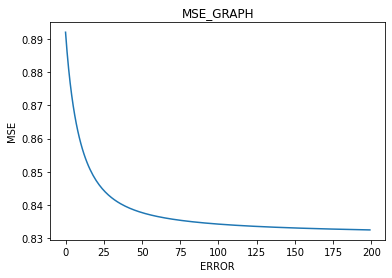

In [90]:
import matplotlib.pyplot as plt
x = list(range(0, 200))
y = MSE
plt.xlabel('ERROR')
plt.ylabel('MSE')
plt.title('MSE_GRAPH')
plt.plot(x,y)

<br>

<font color='red'> Task 2</font>

In [92]:
df = pd.read_csv('/content/drive/MyDrive/Truncated SVD/user_info.csv.txt')


In [93]:
df.head()

,user_id,age,is_male,orig_user_id
0,0,24,1,1
1,1,53,0,2
2,2,23,1,3
3,3,24,1,4
4,4,33,0,5


In [94]:
is_male = df['is_male']
is_male.value_counts()

1    670
0    273
Name: is_male, dtype: int64

In [95]:
print(len(is_male))


943


In [103]:
U, Sigma, V = randomized_svd(adjacency_matrix, n_components=30,n_iter=5, random_state=None)
print(U.shape)

(943, 30)


In [104]:
user_vector = pd.DataFrame(data=U,index=np.arange(1, 944),columns=np.arange(1, 31))
user_vector.head()

,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30
1,0.066226,0.007889,-0.012531,-0.086165,0.024868,0.006654,0.080030,-0.027561,0.067410,0.021266,-0.027380,0.025663,-0.042339,0.039737,-0.015855,0.007101,0.075456,0.012709,-0.065071,-0.035225,-0.108391,0.062569,-0.011491,-0.069302,-0.017345,0.145371,-0.022152,-0.035662,-0.003211,-0.052481
2,0.013644,-0.048895,0.056554,0.015808,-0.012036,0.017733,0.010685,-0.010193,0.028472,-0.009523,0.059256,-0.030588,-0.010970,0.057549,0.009304,-0.031378,-0.004427,-0.016118,0.004135,0.011666,0.007866,0.016040,-0.019726,0.007507,0.009765,0.019433,-0.009459,-0.027309,-0.034435,-0.013972
3,0.005438,-0.025128,0.020028,0.032832,0.035080,0.001920,0.007693,-0.000998,-0.021200,-0.003268,0.000994,0.010534,0.001525,-0.020623,-0.000195,0.014999,0.011118,0.012011,-0.016484,0.005371,0.005973,0.002702,0.025922,0.017972,0.020418,0.015541,0.006483,-0.001157,0.006329,0.002067
4,0.005704,-0.018211,0.010898,0.021867,0.013920,-0.014183,0.012246,-0.009100,-0.012696,0.006092,-0.000182,-0.013487,-0.001707,-0.039363,-0.001879,0.010681,0.015897,0.021278,0.001689,-0.013622,-0.001743,-0.002416,-0.007157,0.007485,-0.012975,0.007634,-0.009362,0.006777,-0.012755,0.002211
5,0.034122,0.009005,-0.044054,-0.016047,0.004326,-0.021501,0.095616,0.079442,-0.017055,0.029698,0.019326,-0.046754,0.005817,0.043999,-0.000491,-0.000272,-0.017337,0.015367,0.040171,0.016454,-0.019934,0.004243,0.043309,0.024933,-0.047276,0.048096,0.071150,-0.006359,-0.008661,-0.019112


In [113]:
from sklearn.linear_model import SGDClassifier
clf = SGDClassifier(loss="log", penalty="l2")
clf.fit(user_vector,is_male)
y_pred_gender = clf.predict(user_vector)


Text(0.5, 1.0, 'Confusion Matrix')

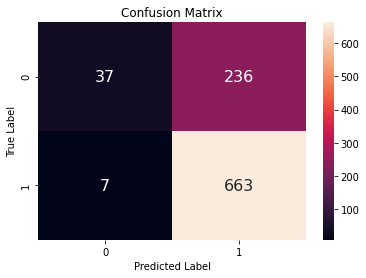

In [114]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
matrix = confusion_matrix(is_male, y_pred_gender)
sns.heatmap(matrix, annot=True, annot_kws={'size':16}, fmt='g')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.title('Confusion Matrix')

In [115]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler().fit_transform(user_vector)

In [117]:
clf = SGDClassifier(loss="log", penalty="l2")
clf.fit(scaler,is_male)
y_pred_gender = clf.predict(user_vector)


Text(0.5, 1.0, 'Confusion Matrix')

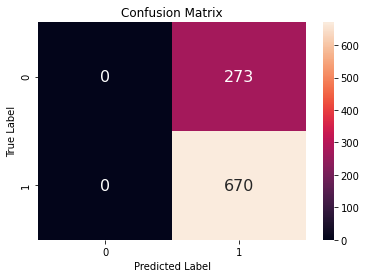

In [118]:
matrix = confusion_matrix(is_male, y_pred_gender)
sns.heatmap(matrix, annot=True, annot_kws={'size':16}, fmt='g')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.title('Confusion Matrix')